In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("csv files/satgpa.csv")
data

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,2,58,64,122,4.00,3.33
2,2,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63
...,...,...,...,...,...,...
995,2,50,50,100,3.70,2.19
996,1,54,54,108,3.30,1.50
997,1,56,58,114,3.50,3.17
998,1,55,65,120,2.30,1.94


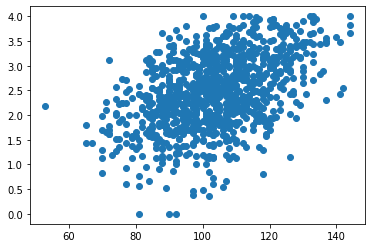

In [4]:
plt.scatter(data.sat_sum,data.fy_gpa)

Given a dataset, the goal of linear regression is to fit a linear model to predict a certain variable. 

- First, we need some metric to measure how good of a fit our current linear model is, such as a function that sums the mean squared errors (the squared distance between the predicted and observed values). 

- Then, we want to find the parameters that minimize this function. For this, we can perform gradient descent, an iterative algorithm that updates each parameter by subtracting the partial derivative of the mean squared errors function (a.k.a loss function) with respect to the parameter until convergence to a minima.

- It is

Hypothesis:
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1 + ... + \theta_j x_j$$

Loss function:
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

Gradient descent:
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

Let's try to predict the GPA using the the data we have on the SAT sum.

In [154]:
def loss(X, Y, theta):  # Loss function
    
    m = np.shape(X)[0]  # Number of training examples
    X = np.stack([np.ones(m), X], axis=1)  # Add column of ones for theta 0
    
    return (1/2*m) * sum(np.power((X @ theta - Y), 2))

When performing gradient descent, we need to choose a learning rate $\alpha$. This parameter controls the speed at which gradient descent occurs. If it is too small, the algorithm can be very slow and if it is too large, gradient descent can overshoot the minima, resulting in divergence. A traditional default value for the learning rate is 0.1 or 0.01, but the optimal value is different in every problem.

In [178]:
def gradient(X, Y, theta, iter_n):  # Gradient descent
   
    X = np.stack([np.ones(m), X], axis=1)  # Add column of ones for the intercept (theta 0)
    loss_history = []  # Save the loss at each iteration
    alpha = 0.0001     # Learning rate
    loss_history = []  # We can append the loss at each iteration to make sure
                       # we are successfully converging
    
    for i in range(iter_n):
        theta = theta - (alpha/m)*(X.T @ ((X @ theta) - Y))
        loss_history.append(loss(data.sat_sum, Y, theta))
    
    return theta, loss_history

In [175]:
theta = np.array([0,0])   # Initialize the hypothesis
theta, loss_history = gradient(data.sat_sum, data.fy_gpa, theta, 10)  # Run the algorithm

One way to visualize what is going on is by printing the loss history


In [177]:
print(loss_history)

[240177.71964354155, 216234.35228731795, 216048.1805061303, 216046.73292634814, 216046.72167058292, 216046.72158296264, 216046.72158218065, 216046.72158207398, 216046.72158197235, 216046.72158187066]


We can see here that theta converged very quickly (this is not always the case)

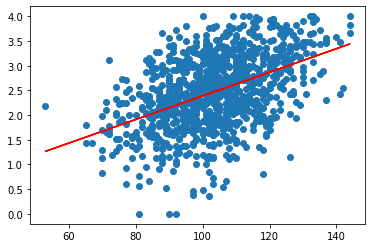

In [176]:
plt.scatter(data.sat_sum,data.fy_gpa)
plt.plot(data.sat_sum, data.sat_sum*theta[1] + theta[0], 'r')

By plotting the data and the linear model, we see that our gradient descent was succesful.